Level 2
Task 1: Table Booking and Online Delivery
Determine the percentage of restaurants thatoffer table booking and online delivery.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.columns = df.columns.str.strip()
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Percentage of Restaurants Offering Table Booking:")
print(f"Yes: {table_booking_percentage.get('Yes', 0):.2f}%")
print(f"No: {table_booking_percentage.get('No', 0):.2f}%\n")

print("Percentage of Restaurants Offering Online Delivery:")
print(f"Yes: {online_delivery_percentage.get('Yes', 0):.2f}%")
print(f"No: {online_delivery_percentage.get('No', 0):.2f}%")


Percentage of Restaurants Offering Table Booking:
Yes: 12.12%
No: 87.88%

Percentage of Restaurants Offering Online Delivery:
Yes: 25.66%
No: 74.34%


Compare the average ratings of restaurants with table booking and those without.

In [6]:
df.columns = df.columns.str.strip()
average_ratings_by_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

print("Average Ratings Comparison:")
print(average_ratings_by_booking) 

Average Ratings Comparison:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


Analyze the availability of online delivery among restaurants with different price ranges.

In [3]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

delivery_analysis = df.groupby('Price range')['Has Online delivery'].agg(
    Total_Restaurants='count',
    Offers_Online_Delivery='sum',
    Proportion=lambda x: x.mean()
).reset_index()

print(delivery_analysis)


   Price range  Total_Restaurants  Offers_Online_Delivery  Proportion
0            1               4444                     701    0.157741
1            2               3113                    1286    0.413106
2            3               1408                     411    0.291903
3            4                586                      53    0.090444


In [7]:
df.columns = df.columns.str.strip()

online_delivery_by_price = df.groupby(['Price range', 'Has Online delivery'])['Restaurant ID'].count().unstack(fill_value=0)

online_delivery_percentage = (online_delivery_by_price.div(online_delivery_by_price.sum(axis=1), axis=0) * 100)

print("Percentage of Restaurants Offering Online Delivery by Price Range:")
print(online_delivery_percentage)

Percentage of Restaurants Offering Online Delivery by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


Task 2
Determine the most common price range
among all the restaurants.

In [45]:
price_range = df['Price range'].value_counts()

In [48]:
common_price_range = price_range.idxmax()
print(f"Most Common Price Range : {common_price_range}")
print("Breakdown of restarants by price range\n")
print(price_range)

Most Common Price Range : 1
Breakdown of restarants by price range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [49]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),NaN,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),NaN,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),NaN,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),NaN,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),NaN,No,No,No,4,4.8,Dark Green,Excellent,229


Calculate the average rating for each price
range.
Identify the color that represents the highest
average rating among different price ranges.

In [62]:
avg_rating = df.groupby('Price range')['Aggregate rating'].mean()
print("Aggregate rating by price range")
print(avg_rating)

highest_avg_rating = avg_rating.idxmax()
highest_avg_rating_value = avg_rating.max()
print(highest_avg_rating)
print(highest_avg_rating_value)

highest_avg_rating_color = df[df['Price range'] == highest_avg_rating]['Rating color'].mode()[0]
print(highest_avg_rating_color)

Aggregate rating by price range
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
4
3.8179180887372017
Yellow


Task 3: Feature Engineering

Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

In [4]:
df['Name_Length'] = df['Restaurant Name'].astype(str).apply(len)
df['Name_Word_Count'] = df['Restaurant Name'].astype(str).apply(lambda x:len (x.split()))
df['Address_Length'] = df['Address'].astype(str).apply(len)
df['Address_Word_Count'] = df['Address'].astype(str).apply(lambda x:len (x.split()))
df[['Restaurant Name' , 'Name_Length' ,'Name_Word_Count','Address_Length','Address_Word_Count']]


,Restaurant Name,Name_Length,Name_Word_Count,Address_Length,Address_Word_Count
0,Le Petit Souffle,16,3,71,10
1,Izakaya Kikufuji,16,2,67,10
2,Heat - Edsa Shangri-La,22,4,56,8
3,Ooma,4,1,70,10
4,Sambo Kojin,11,2,64,9
...,...,...,...,...,...
9546,Naml۱ Gurme,11,2,103,13
9547,Ceviz A��ac۱,12,2,77,9
9548,Huqqa,5,1,73,9
9549,A���k Kahve,11,2,75,9


Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.

In [5]:
rating_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1,
    'Not rated': 0
}
df['Rating_Score'] = df['Rating text'].map(rating_mapping)

In [6]:
df[['Rating text' , 'Rating_Score']].drop_duplicates()

,Rating text,Rating_Score
0,Excellent,5
2,Very Good,4
15,Good,3
22,Average,2
30,Not rated,0
312,Poor,1


In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Name_Length,Name_Word_Count,Address_Length,Address_Word_Count,Rating_Score
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,16,3,71,10,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,16,2,67,10,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,22,4,56,8,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4,4.9,Dark Green,Excellent,365,4,1,70,10,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4,4.8,Dark Green,Excellent,229,11,2,64,9,5


Level 3
Task: Predictive Modeling
Build a regression model to predict theaggregate rating of a restaurant based onavailable features.
Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.

In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
columns_to_drop = ['Restaurant ID' , 'Restaurant Name','Address','City', 'Locality' , 'Locality Verbose', 'Cuisines']
df_cleaned = df.drop(columns=columns_to_drop)
categorical_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color','Rating text',
                    'Country Code']
label_encoders={}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col]=le

df_cleaned=df_cleaned.dropna()

x=df_cleaned.drop('Aggregate rating' , axis=1)
y=df_cleaned['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train , y_train)

y_pred= model.predict(X_test)

mae= mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print(f"Mean Absolute Error : {mae:.3f}")
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"R2 Score : {r2:.3f}")


Mean Absolute Error : 0.120
Root Mean Squared Error : 0.176
R2 Score : 0.986


Experiment with different algorithms 
(e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [38]:
selected_columns = ['Has Table booking', 'Has Online delivery', 'Price range', 'Votes', 'Aggregate rating']
df_model = df[selected_columns].copy()

df_model['Votes']= pd.to_numeric(df_model['Votes'],errors = 'coerce')
df_model.dropna(inplace = True)

df_model['Has Table booking'] = df_model['Has Table booking'].map({'Yes':1,'No':0})
df_model['Has Online delivery'] = df_model['Has Online delivery'].map({'Yes':1,'No':0})

x= df_model.drop('Aggregate rating',axis=1)
y=df_model['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train , y_train)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

def evaluate_model(model , name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test , y_pred)
    r2 = r2_score(y_test , y_pred)
    return{"Model":name,"MSE":mse,"R2Score":r2}

results = [
    evaluate_model(lr,"Linear Regression"),
    evaluate_model(dt,"Decision Tree"),
    evaluate_model(rf ,"Random Forest")
]

result_df = pd.DataFrame(results)
print(result_df)


               Model       MSE   R2Score
0  Linear Regression  1.317866  0.421000
1      Decision Tree  0.061227  0.973100
2      Random Forest  0.030991  0.986384


Task 2:Analyze the relationship between the type of cuisine and the restaurant's rating.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\1738477146.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating' , y='Cuisine' , data = filtered, palette='magma')


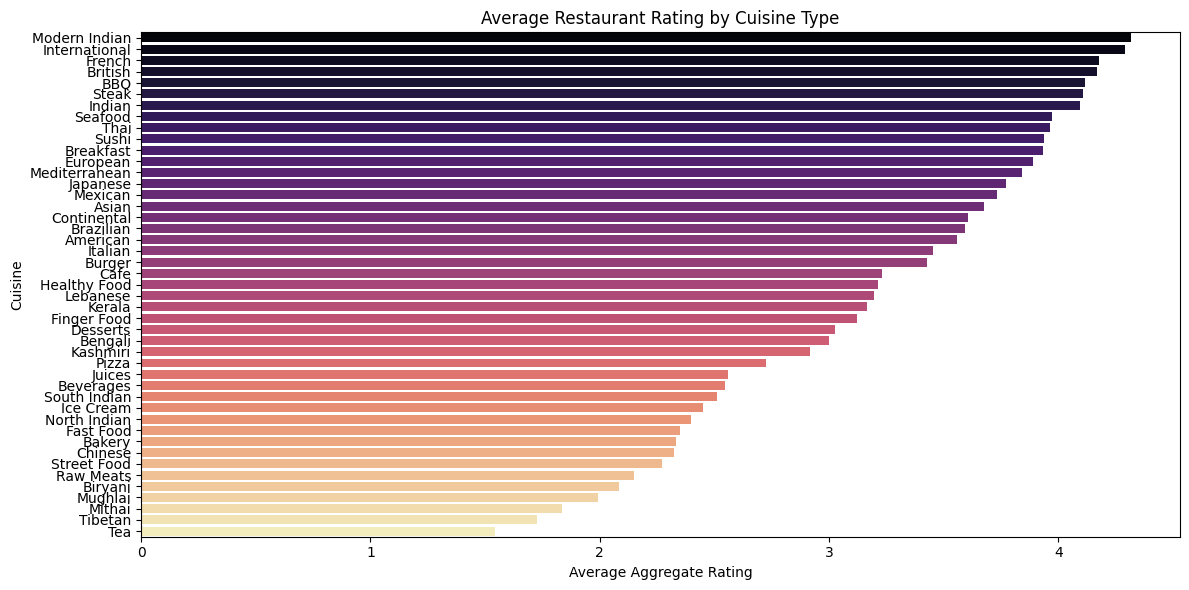

In [50]:
df_cuisine = df[['Cuisines','Aggregate rating']].copy()
df_cuisine.dropna(subset=['Cuisines','Aggregate rating'],inplace = True)
df_cuisine['Main Cuisine'] = df_cuisine['Cuisines'].apply(lambda x: x.split(',')[0].strip())
cuisine_rating = df_cuisine.groupby('Main Cuisine').agg({
    'Aggregate rating': ['mean', 'count']
}).reset_index()

cuisine_rating.columns=['Cuisine','Average Rating','Restaurant Count']

filtered = cuisine_rating[cuisine_rating['Restaurant Count']>10]
filtered = filtered.sort_values(by = 'Average Rating' , ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Average Rating' , y='Cuisine' , data = filtered, palette='magma')
plt.title("Average Restaurant Rating by Cuisine Type")
plt.xlabel("Average Aggregate Rating")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()




In [ ]:
Identify the most popular cuisines among customers based on the number of votes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\3320629691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Main Cuisine', data=top_cuisines, palette='viridis')


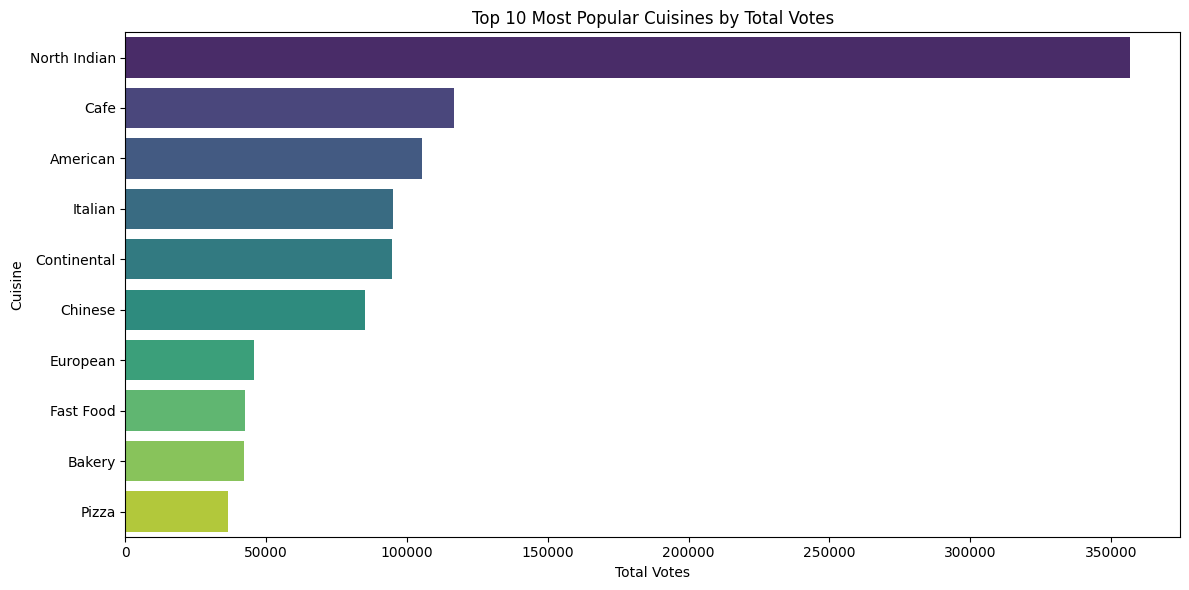

In [57]:
df_votes = df[['Cuisines','Votes']].copy()
df_votes.dropna(inplace = True)
df_votes['Votes']= pd.to_numeric(df_votes['Votes'],errors='coerce')
df_votes.dropna(inplace = True)
df_votes['Main Cuisine'] = df_votes['Cuisines'].apply(lambda x: x.split(',')[0].strip())
cuisine_votes = df_votes.groupby('Main Cuisine')['Votes'].sum().reset_index()
top_cuisines = cuisine_votes.sort_values(by='Votes',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Votes', y='Main Cuisine', data=top_cuisines, palette='viridis')
plt.title("Top 10 Most Popular Cuisines by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

Determine if there are any specific cuisinesthat tend to receive higher ratings.

In [7]:
df_clean = df[['Cuisines','Aggregate rating']].dropna()
df_clean['Cuisines'] = df['Cuisines'].str.split(',')
df_explode = df_clean.explode('Cuisines')
cuisine_rating = df_explode.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False)
print("Top 10 Highest Rate Cuisines:")
print(cuisine_rating.head(10))

Top 10 Highest Rate Cuisines:
Cuisines
Sunda         4.900000
Cajun         4.700000
Scottish      4.700000
 B�_rek       4.700000
 Caribbean    4.666667
Taiwanese     4.650000
Filipino      4.616667
Persian       4.600000
Ramen         4.600000
Argentine     4.500000
Name: Aggregate rating, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9560\1937564568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_rating.head(10).values, y=cuisine_rating.head(10).index, palette='viridis')


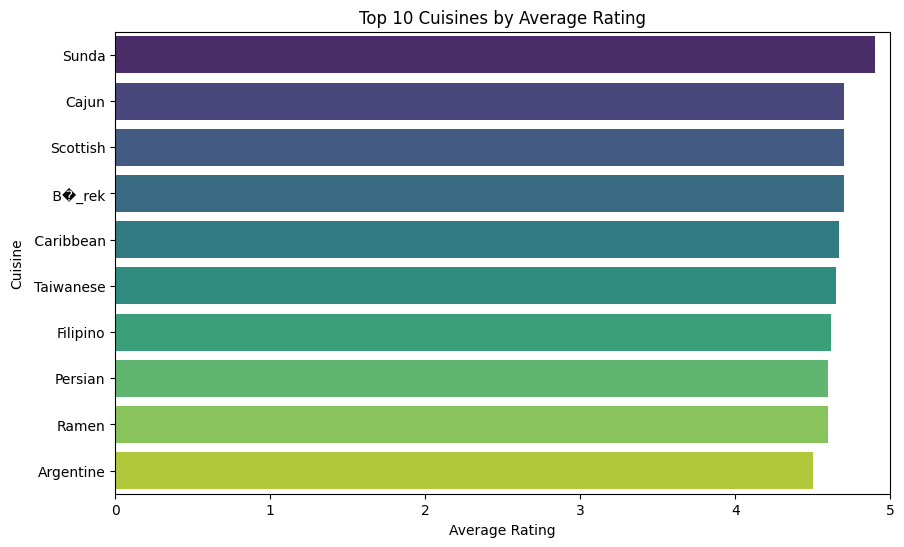

In [10]:
plt.figure(figsize = (10,6))
sns.barplot(x=cuisine_rating.head(10).values, y=cuisine_rating.head(10).index, palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Top 10 Cuisines by Average Rating")
plt.xlim(0, 5)
plt.show()

Task 3: Data Visualization
Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.)

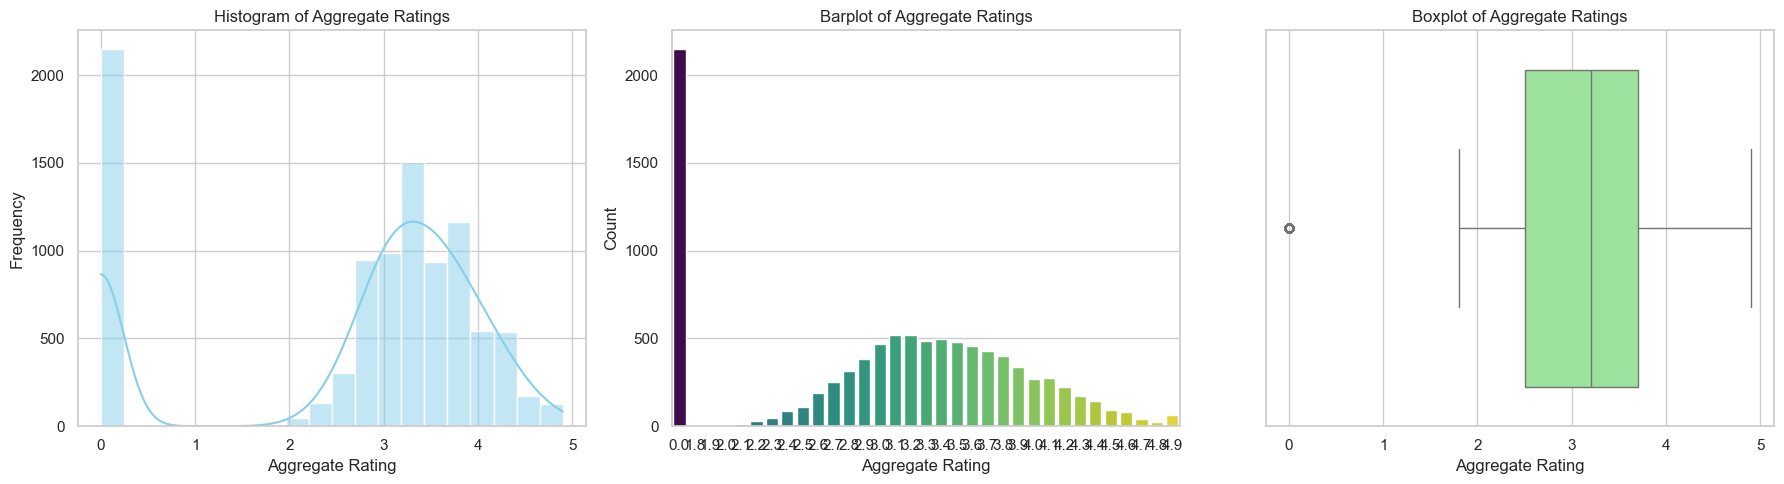

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

ratings = df['Aggregate rating'].dropna()
sns.set(style="whitegrid")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(ratings, bins=20, kde=True, color='skyblue')
plt.title('Histogram of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.countplot(x='Aggregate rating', data=df, hue='Aggregate rating', palette='viridis', legend=False)
plt.title('Barplot of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(x=ratings, color='lightgreen')
plt.title('Boxplot of Aggregate Ratings')
plt.xlabel('Aggregate Rating')

plt.tight_layout()
plt.show()

Compare the average ratings of different cuisinesor cities using appropriate visualizations.

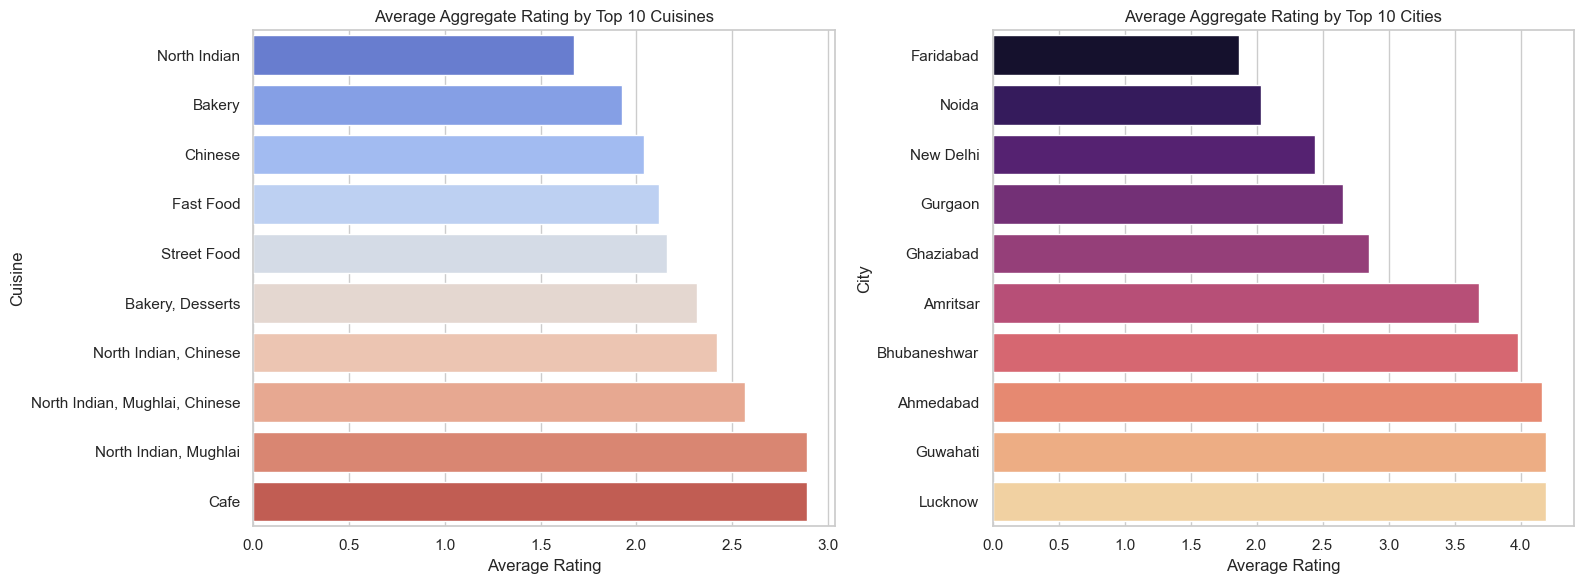

In [9]:
df = df.dropna(subset=['Aggregate rating'])

top_cuisines = df['Cuisines'].value_counts().head(10).index
avg_rating_by_cuisine = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()

top_cities = df['City'].value_counts().head(10).index
avg_rating_by_city = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x=avg_rating_by_cuisine.values,
    y=avg_rating_by_cuisine.index,
    hue=avg_rating_by_cuisine.index,  # Use y variable as hue
    palette='coolwarm',
    legend=False
)
plt.title('Average Aggregate Rating by Top 10 Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')

plt.subplot(1, 2, 2)
sns.barplot(
    x=avg_rating_by_city.values,
    y=avg_rating_by_city.index,
    hue=avg_rating_by_city.index,  # Use y variable as hue
    palette='magma',
    legend=False
)
plt.title('Average Aggregate Rating by Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')

plt.tight_layout()
plt.show()

Visualize the relationship between variousfeatures and the target variable to gain insights.

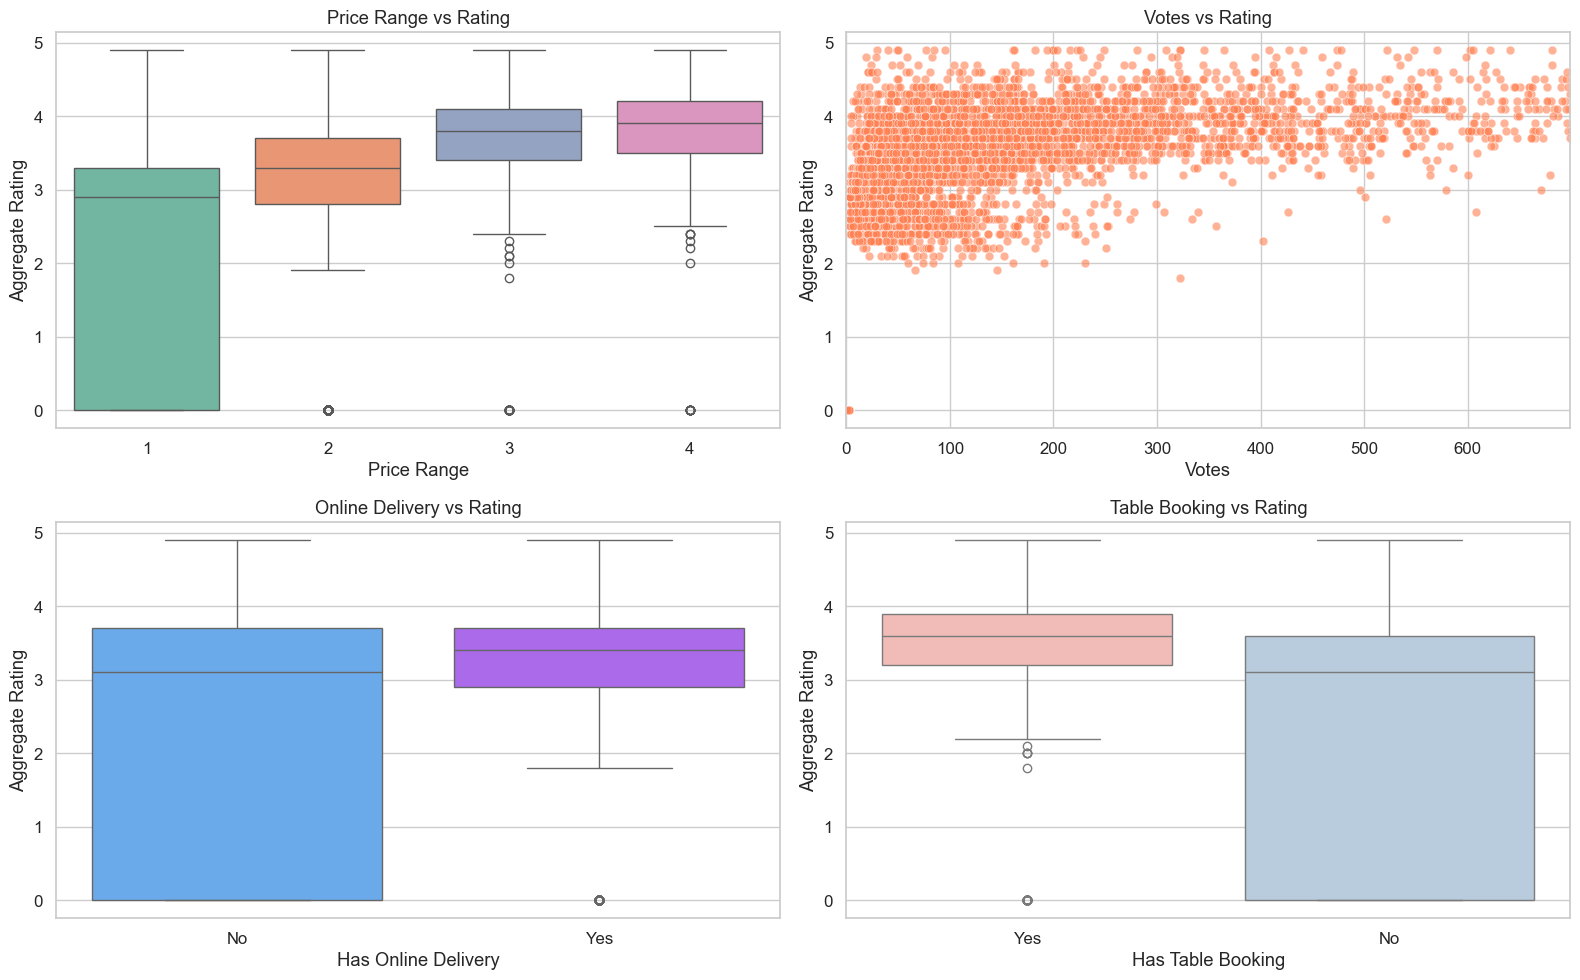

In [14]:
df = df.dropna(subset=['Aggregate rating'])

df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 'Yes', 'No': 'No'})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 'Yes', 'No': 'No'})

sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Price range', y='Aggregate rating', hue='Price range', data=df, palette='Set2', legend=False)
plt.title('Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='coral', alpha=0.6, edgecolor='w', s=40)
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.xlim(0, df['Votes'].quantile(0.95))

plt.subplot(2, 2, 3)
sns.boxplot(x='Has Online delivery', y='Aggregate rating', hue='Has Online delivery',
            data=df, palette='cool', legend=False)
plt.title('Online Delivery vs Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')

plt.subplot(2, 2, 4)
sns.boxplot(x='Has Table booking', y='Aggregate rating', hue='Has Table booking',
            data=df, palette='Pastel1', legend=False)
plt.title('Table Booking vs Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()